## 実験1-1：他モデルとの予測精度の比較：CHINA

### 入力データの取得

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seq_len = 96
pred_len = 192

df_true = pd.read_csv('dataset/BTC/order_book_3_2014_new_1_2_UP.csv')
df_last = df_true[-pred_len:]
df_csv = df_true[0:-pred_len]
df_csv.to_csv('dataset/BTC/order_book_3_2014_new_1_2_UP_pred.csv', index=False)

df2 = df_last.drop(df_last.columns[0], axis=1)
df2 = df2.reset_index(drop=True)
df2


,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,62,63,64,65,66,OT
0,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.35486,-0.28409,-0.28409,-0.21322,...,0.109637,1.350165,0.148996,0.964507,-0.018067,1.050273,0.024520,7.125045,7020.0,7015.0
1,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.35486,-0.28409,-0.28409,-0.21322,...,0.118222,1.384961,0.161412,0.968534,-0.015985,1.060094,0.029171,7.125045,7020.0,7015.0
2,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.35486,-0.28409,-0.28409,-0.21322,...,0.246779,1.801460,0.286087,1.015591,0.007735,1.153419,0.071244,7.125045,7020.0,7015.0
3,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.35486,-0.28409,-0.28409,-0.21322,...,0.215165,1.690411,0.256619,1.004663,0.002326,1.131656,0.061762,7.125045,7020.0,7015.0
4,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.28409,-0.35486,-0.28409,-0.28409,-0.21322,...,0.215165,1.690411,0.256619,1.004663,0.002326,1.131656,0.061762,7.125045,7020.0,7015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-0.07117,-0.14225,-0.14225,-0.07117,-0.21322,-0.28409,-0.21322,-0.28409,-0.28409,-0.28409,...,0.164372,1.619122,0.236385,1.122930,0.057906,1.244596,0.108971,7.125045,7020.0,7015.0
188,-0.07117,-0.14225,-0.14225,-0.07117,-0.21322,-0.28409,-0.21322,-0.28409,-0.28409,-0.28409,...,0.164372,1.619122,0.236385,1.122930,0.057906,1.244596,0.108971,7.125045,7020.0,7015.0
189,-0.07117,-0.14225,-0.14225,-0.07117,-0.21322,-0.28409,-0.21322,-0.28409,-0.28409,-0.28409,...,0.131425,1.478056,0.192916,1.100351,0.047778,1.193402,0.088174,7.125045,7020.0,7015.0
190,-0.07117,-0.14225,-0.14225,-0.07117,-0.21322,-0.28409,-0.21322,-0.28409,-0.28409,-0.28409,...,0.021355,1.066742,0.032293,1.036389,0.017870,1.046906,0.022916,7.125045,7020.0,7015.0


### 予測結果の格納


In [148]:
# ファイルを読み込んで表示
#Transformer
data = np.load("exp1_results/China/China_Transformer_prediction.npy")
df = pd.DataFrame(data)
df.columns = df2.columns
#Informer
data = np.load("exp1_results/China/China_Informer_prediction.npy")
df_info = pd.DataFrame(data)
df_info.columns = df2.columns
#Autoformer
data = np.load("exp1_results/China/China_Autoformer_prediction.npy")
df_auto = pd.DataFrame(data)
df_auto.columns = df2.columns
#FEDformer
data = np.load("exp1_results/China/China_FEDformer_prediction.npy")
df_fed = pd.DataFrame(data)
df_fed.columns = df2.columns
#Linear
data = np.load("exp1_results/China/China_Linear_prediction.npy")
df_linear = pd.DataFrame(data)
df_linear.columns = df2.columns
#DLinear
data = np.load("exp1_results/China/China_DLinear_prediction.npy")
df_dlinear = pd.DataFrame(data)
df_dlinear.columns = df2.columns

#Ns-Transformer
data = np.load("exp1_results/China/China_Ns_Transformer_prediction.npy")
df_ns = pd.DataFrame(data)
df_ns.columns = df2.columns

In [149]:
df_last_pred = df_true.iloc[-(pred_len+seq_len):-pred_len]
df_input = df_last_pred.drop(df_last_pred.columns[0], axis=1)
df_input = df_input.reset_index(drop=True)
df_input


,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,62,63,64,65,66,OT
0,-0.28409,-0.35486,-0.35486,-0.35486,-0.28409,-0.28409,-0.21322,-0.14225,-0.28409,-0.21322,...,-0.075522,0.954296,-0.023386,0.886093,-0.060393,0.912696,-0.045645,7.125045,7020.0,7015.0
1,-0.28409,-0.35486,-0.35486,-0.35486,-0.28409,-0.28409,-0.21322,-0.14225,-0.28409,-0.21322,...,0.065817,1.392354,0.164003,0.958249,-0.021320,1.075500,0.036377,7.125045,7020.0,7015.0
2,-0.28409,-0.35486,-0.35486,-0.35486,-0.28409,-0.28409,-0.21322,-0.14225,-0.28409,-0.21322,...,0.113929,1.530973,0.209790,0.978007,-0.011119,1.113326,0.053624,7.125045,7020.0,7015.0
3,-0.35511,-0.35511,-0.42583,-0.42583,-0.35511,-0.35511,-0.28429,-0.21337,-0.28429,-0.28429,...,-0.089962,0.731561,-0.155027,0.614586,-0.238708,0.630226,-0.226824,7.130125,7015.0,7010.0
4,-0.35511,-0.35511,-0.35511,-0.42583,-0.35511,-0.35511,-0.28429,-0.21337,-0.28429,-0.28429,...,-0.007135,0.918937,-0.042244,0.653979,-0.209205,0.709887,-0.169668,7.130125,7015.0,7010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-0.35511,-0.35511,-0.28429,-0.35511,-0.35511,-0.42583,-0.42583,-0.35511,-0.35511,-0.28429,...,-0.122516,0.817030,-0.100697,0.691260,-0.182551,0.723541,-0.160402,7.130125,7015.0,7010.0
92,-0.35511,-0.35511,-0.28429,-0.35511,-0.35511,-0.42583,-0.42583,-0.35511,-0.35511,-0.28429,...,-0.122516,0.817030,-0.100697,0.691260,-0.182551,0.723541,-0.160402,7.130125,7015.0,7010.0
93,-0.35511,-0.35511,-0.28429,-0.35511,-0.35511,-0.42583,-0.42583,-0.35511,-0.35511,-0.28429,...,-0.131026,0.798733,-0.111894,0.687918,-0.184892,0.716280,-0.165311,7.130125,7015.0,7010.0
94,-0.35511,-0.35511,-0.35511,-0.35511,-0.35511,-0.35511,-0.42583,-0.35511,-0.35511,-0.28429,...,-0.144350,0.770131,-0.129860,0.694249,-0.180464,0.714406,-0.166585,7.130125,7015.0,7010.0


In [150]:
#Ground Truth
df_concat_true = pd.concat([df_input, df2], ignore_index=True)
#Transformer
df_input.columns = df.columns
df_concat_pred = pd.concat([df_input, df], ignore_index=True)
#Informer
df_input.columns = df_info.columns
df_concat_pred_info = pd.concat([df_input, df_info], ignore_index=True)
#Autoformer
df_input.columns = df_auto.columns
df_concat_pred_auto = pd.concat([df_input, df_auto], ignore_index=True)
#FEDformer
df_input.columns = df_fed.columns
df_concat_pred_fed = pd.concat([df_input, df_fed], ignore_index=True)
#Linear
df_input.columns = df_linear.columns
df_concat_pred_linear = pd.concat([df_input, df_linear], ignore_index=True)
#DLinear
df_input.columns = df_dlinear.columns
df_concat_pred_dlinear = pd.concat([df_input, df_dlinear], ignore_index=True)
#Ns-Transformer
df_input.columns = df_ns.columns
df_concat_pred_ns = pd.concat([df_input, df_ns], ignore_index=True)

### Plot of results

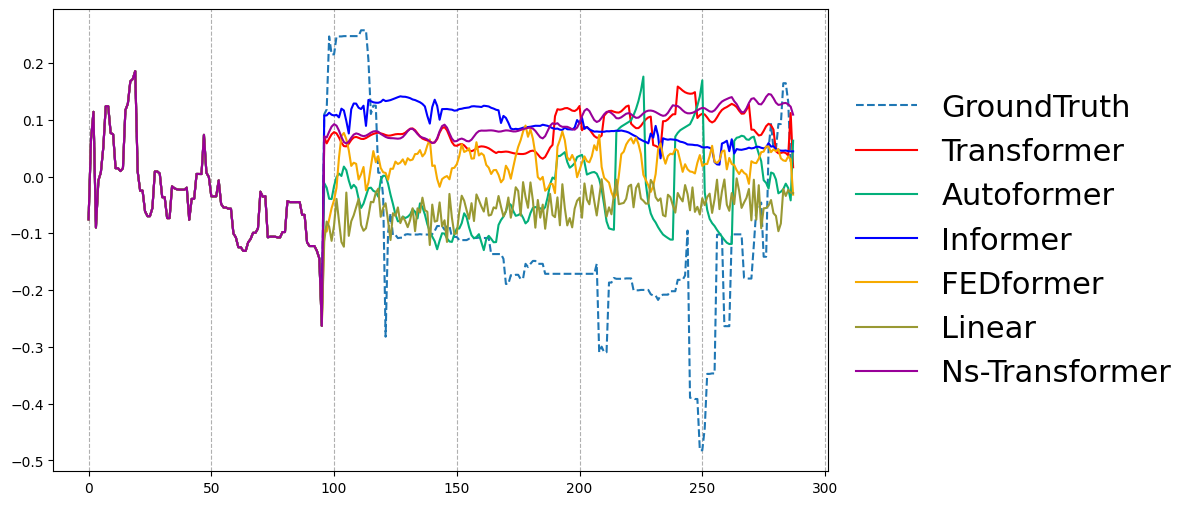

In [154]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

df_concat_true.plot(y=57,ax=ax,linestyle='--')
df_concat_pred.plot(y=57, ax=ax,color='r')
df_concat_pred_auto.plot(y=57, ax=ax,color='#03AF7A')
df_concat_pred_info.plot(y=57, ax=ax,color='b')
df_concat_pred_fed.plot(y=57, ax=ax,color='#F6AA00')
df_concat_pred_linear.plot(y=57, ax=ax,color='#999933',)
# df_concat_pred_dlinear.plot(y=57, ax=ax,color='#03AF7A')
df_concat_pred_ns.plot(y=57, ax=ax,color='#990099')
# colors = ['r', '#03AF7A', 'b', 'c', '#990099', '#F6AA00', '#999933']  # 異なる色の種類
# ax.legend(['GroundTruth', 'Transformer', 'Autoformer', 'Informer', 'FEDformer', 'Linear', 'DLinear', 'Ns-Transformer'], loc='lower center', bbox_to_anchor=(0.5, 1), frameon=False, fancybox=False, shadow=False, ncol=4,fontsize=14)
ax.legend(['GroundTruth', 'Transformer', 'Autoformer', 'Informer', 'FEDformer', 'Linear', 'Ns-Transformer'],
          loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fancybox=False, shadow=False, ncol=1, fontsize=22)
ax.grid(axis='x', linestyle='--')


plt.savefig('exp1_results/fig/exp1_China_prediction.png')

plt.show()